<a href="https://colab.research.google.com/github/Dih08/projetos-simples-e-aleatorios/blob/main/Reconhecimento_de_imagens_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


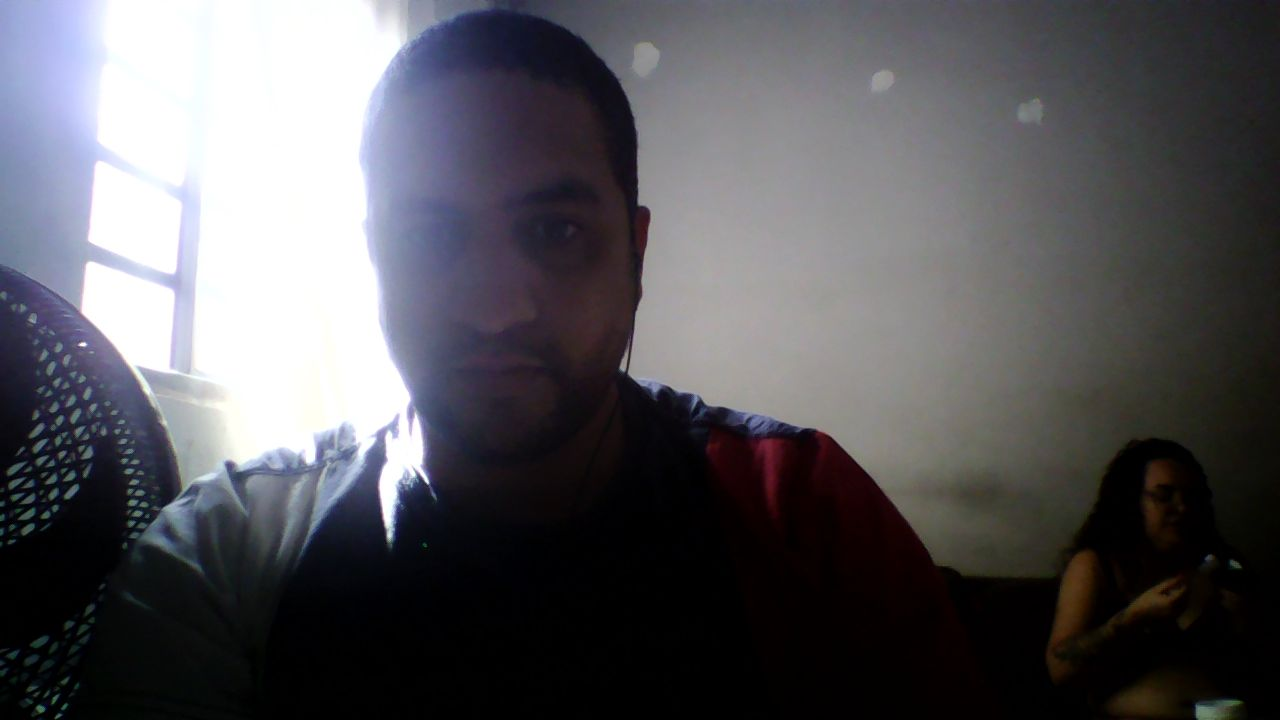

In [6]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [7]:
image = cv2.imread('photo.jpg')

In [8]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)


In [9]:
ss.switchToSelectiveSearchFast()

In [10]:
retangulos = ss.process()

In [11]:
retangulos.shape

(5230, 4)

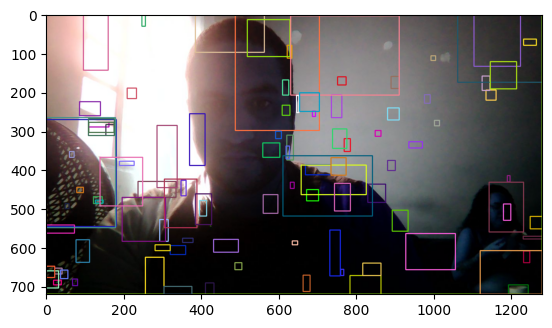

In [18]:
# vamos pegar k retangulos e plotar
k = 100
retangulos_aleatorios = retangulos[np.random.randint(low= 0, high= retangulos.shape[0],size = k),]
output =  image.copy()
for (a,b,w,h) in retangulos[0:100]:
  color = [np.random.randint(0,255) for j in range(0,3)]
  cv2.rectangle(output,(a,b),(a+w,b+h),color,2)



  plt.imshow(output)

In [15]:
ss.switchToSelectiveSearchQuality()

In [16]:
retangulos = ss.process()

In [17]:
retangulos.shape

(12918, 4)

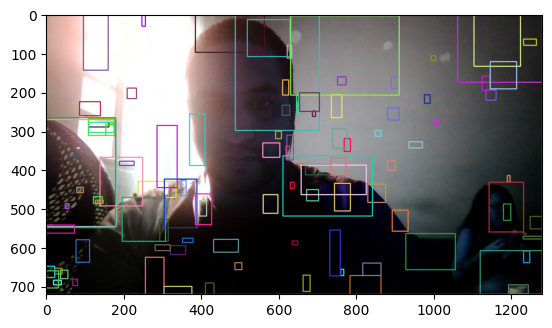

In [21]:
#vamos plotar

k = 100
retangulos_aleatorios = retangulos[np.random.randint(low= 0, high= retangulos.shape[0],size = k),]
output =  image.copy()
for (a,b,w,h) in retangulos[0:100]:
  color = [np.random.randint(0,255) for j in range(0,3)]
  cv2.rectangle(output,(a,b),(a+w,b+h),color,2)

  plt.imshow(output)


In [22]:
retangulos[150]

array([891, 608,  13,   8], dtype=int32)